In [46]:
import plot_map
import pandas as pd
#读取数据    
data = pd.read_csv('TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','time','slon','slat','OpenStatus','Speed'] 

In [47]:
#简要数据清洗
data = data.sort_values(by = ['VehicleNum','time'])
data = data[-((data['OpenStatus'] != data['OpenStatus'].shift())& 
(data['OpenStatus'] != data['OpenStatus'].shift(-1))& 
(data['VehicleNum'] == data['VehicleNum'].shift())& 
(data['VehicleNum'] == data['VehicleNum'].shift(-1)))] 

# 出租车GPS中提取OD

In [48]:
#从GPS数据提取OD
oddata = plot_map.taxigps_to_od(data,col = ['VehicleNum','time','slon','slat','OpenStatus'])

# OD集计（栅格）

In [49]:
#定义研究范围
bounds = [113.6,22.4,114.8,22.9]
#获取栅格化参数
params = plot_map.grid_params(bounds = bounds,accuracy = 1500)
#栅格化OD并集计
od_gdf = plot_map.odagg_grid(oddata,params)
od_gdf.plot(column = 'count')

<AxesSubplot:>

## 加载底图

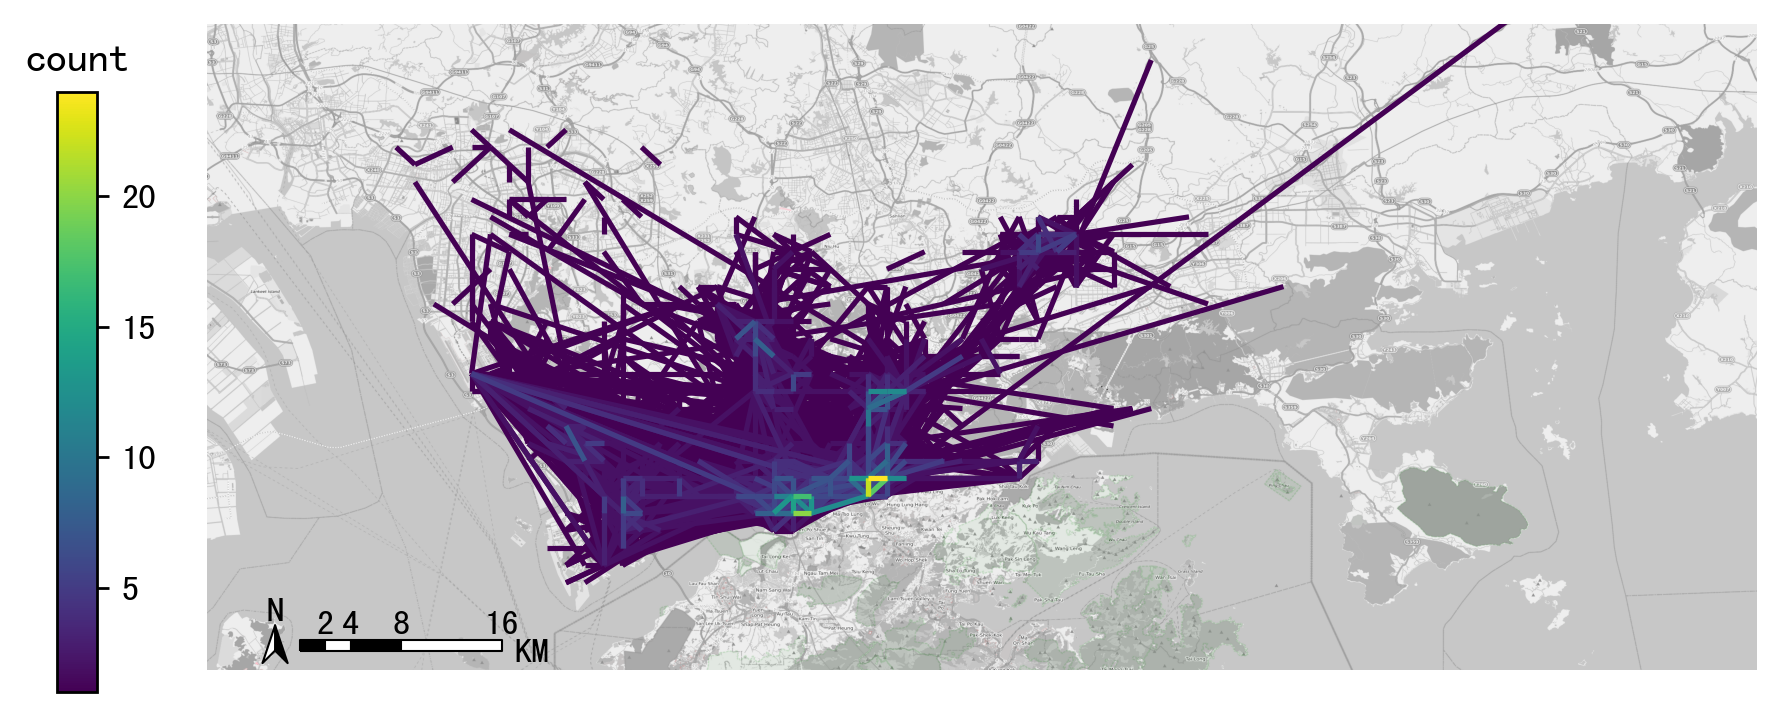

In [50]:
#创建图框
import matplotlib.pyplot as plt
import plot_map
fig =plt.figure(1,(8,8),dpi=250)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)
#绘制colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('count')
plt.sca(ax)
#绘制OD
od_gdf.plot(ax = ax,column = 'count',cax = cax,legend = True)
#添加比例尺和指北针
plot_map.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()

# OD集计（小区）

<AxesSubplot:>

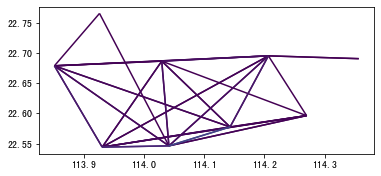

In [54]:
#读取区域信息
import geopandas as gpd
sz = gpd.read_file(r'sz.json')
sz.crs = None
#OD集计到小区（在不传入栅格化参数时，直接用经纬度匹配）
od_gdf = plot_map.odagg_shape(oddata,sz,round_accuracy=6)
od_gdf.plot(column = 'count')

<AxesSubplot:>

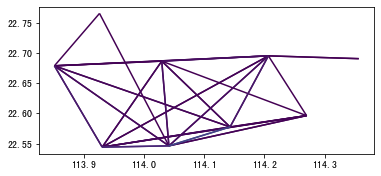

In [55]:
#OD集计到小区（传入栅格化参数时，先栅格化后匹配，可加快匹配速度，数据量大时建议使用）
od_gdf = plot_map.odagg_shape(oddata,sz,params = params)
od_gdf.plot(column = 'count')

In [52]:
#创建图框
import matplotlib.pyplot as plt
import plot_map
fig =plt.figure(1,(8,8),dpi=80)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)
#绘制colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('count')
plt.sca(ax)
#绘制OD
od_gdf.plot(ax = ax,vmax = 100,column = 'count',cax = cax,legend = True)
#绘制小区底图
sz.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0.2),linewidths=0.5)
#添加比例尺和指北针
plot_map.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()